# Free space loss

https://en.wikipedia.org/wiki/Free-space_path_loss#Free-space_path_loss_in_decibels

In [106]:
%matplotlib notebook
%pylab inline

import numpy

def free_space_path_loss(frequency, distance, transmitter_gain=0, receiver_gain=0):
    return 20 * numpy.log10(distance) + 20 * numpy.log10(frequency) - 147.55 - transmitter_gain - receiver_gain

Populating the interactive namespace from numpy and matplotlib


## Free space loss for 1GHz to 5GHz without antenna gain

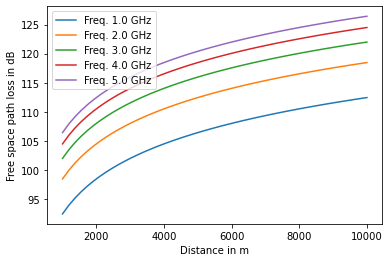

In [107]:
distances = linspace(1000, 10000)

for frequency in range(1*10**9,6*10**9, 1*10**9):
    plot(distances, free_space_path_loss(frequency, distances), label='Freq. {} GHz'.format(frequency/10**9))

xlabel("Distance in m")
ylabel("Free space path loss in dB")
legend(loc='upper left')


## Free space path loss with antenna gain

Sum of antenna gain: 19 dbi


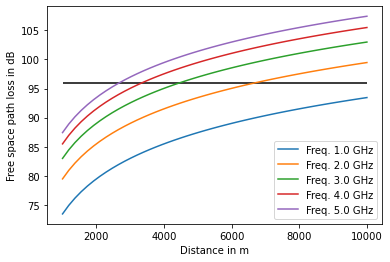

In [118]:
distances = linspace(1000, 10000)

tx_antenna_gain = 3 # dBi e.g. omni
rx_antenna_gain = 16 # dBi e.g. sector

sensitivity = 96 # dBm +- 2 dBm tolerance e.g. sector as receiver

hlines(96, 1000, 10000)

print(f'Sum of antenna gain: {tx_antenna_gain + rx_antenna_gain} dbi')

for frequency in range(1*10**9,6*10**9, 1*10**9):
    plot(distances, free_space_path_loss(frequency, distances, tx_antenna_gain, rx_antenna_gain), label='Freq. {} GHz'.format(frequency/10**9))

xlabel("Distance in m")
ylabel("Free space path loss in dB")
legend(loc='lower right')